<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-01-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [1]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
2+2 

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

#Library numpy and matlpotlib
I would like to explore matplotlib and reproduce the example I saw on their website. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt


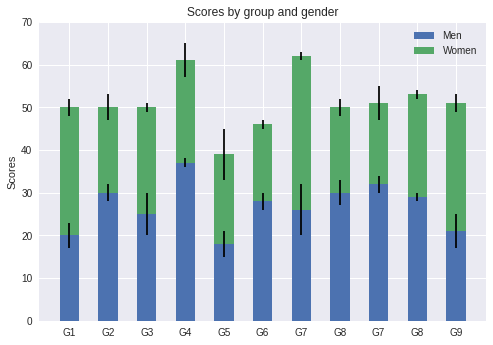

In [26]:
# TODO - your code here
# Use what we did live in lecture as an example
#import munpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 11
menMeans = (20, 30, 25, 37,18, 28, 26, 30, 32, 29, 21)
womenMeans = (30, 20, 25, 24, 21, 18, 36, 20, 19, 24, 30)
menStd = (3,2,5,1,3,2,6,3,2,1,4)
womenStd =(2,3,1,4,6,1,1,2,4,1,2)
ind = np.arange(N)
#ind = np.arange(N)
width = 0.50

p1= plt.bar(ind, menMeans, width, yerr = menStd)
p2 = plt.bar(ind, womenMeans, width, bottom = menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2','G3','G4','G5','G6','G7','G8','G7','G8','G9','G10', 'G11' ))
plt.yticks(np.arange(0, 80, 10))
plt.legend(('Men', 'Women'))

plt.show()




### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

Ans: I chose to replicate the results of one of the matplotlib exmaples. Here, we are plotting the average scores of men and women and our spread or scores around the average meaning how far the scores vlaues are spread out. Women average scores are in green, on top of men scores and black lines indicate our spread.  

2.  What was the most challenging part of what you did?
underatding the code!

3.  What was the most interesting thing you learned?
I can change the data and and a few things in the code to expect different results

4.  What area would you like to explore with more time?
Learning how to code, understanding the loops, functions. Building my understanding from basic to complex programming and ideas. 




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about

#Writing a code to quantify the gardening store data given in the 1st lecture 

####gardening data to check which store is profitable.


In [47]:
#create a dictionary of the following companies with these keys
Grow_mart = {'Name': 'Grow Mart','Year Founded': 1973, 'expenses': 183, 'revenue': 265 } 
Plant_depot = {'Name': 'Plant Depot','Year Founded': 1973, 'expenses':240, 'revenue': 230 }
Trees_r_us = {'Name': 'Trees'R'Us', 'Year Founded': 1985, 'expenses':130, 'revenue': 123  }
#create a list of the above dictionaries
companies = [Grow_mart, Plant_depot, Trees_r_us] #list of dictionaries
print(company)
  

[{'Company': 'Grow Mart', 'Year Founded': 1973, 'expenses': 183, 'revenue': 265}, {'Company': 'Plant Depot', 'Year Founded': 1973, 'expenses': 240, 'revenue': 230}, {'Company': 'TreesUs', 'Year Founded': 1985, 'expenses': 130, 'revenue': 123}]


In [0]:
#define how to measure profitability. is_profitable is boolean. It returns TRUE or FALSE
def is_profitable(company):  #call the list
  profit = company['revenue'] - company['expenses'] #inside the list 
  return profit > 0 
  

In [66]:
#call the function to know if an individual company is profitable 
is_profitable(Trees_r_us) #call the function and input any item from the list called company

False

In [49]:
#write a for loop to know the most profitable company
largest_profit = 0 #define outside the function
most_profitable_company = 'name' #output the name of the most profitable company 
for each_company in companies:
  profit = each_company['revenue'] - each_company['expenses']
  if profit > largest_profit:
    largest_profit = profit
    most_profitable_company = each_company['Name']
    
print(largest_profit, most_profitable_company)
  

82 Grow Mart
